In [1]:
%matplotlib inline


# OpenStreetMap with OSMnx

This example shows how to use OSMnx to download and model a street network
from OpenStreetMap, visualize centrality, and save the graph as a shapefile,
a GeoPackage, or GraphML.

OSMnx is a Python package to retrieve, model, analyze, and visualize
OpenStreetMap street networks as NetworkX MultiDiGraph objects. It can also
retrieve any other spatial data from OSM as geopandas GeoDataFrames. See
https://osmnx.readthedocs.io/ for OSMnx documentation and usage.


In [16]:
import networkx as nx
import osmnx as ox

ox.settings.log_console=True
ox.settings.use_cache=True

# download street network data from OSM and construct a MultiDiGraph model
G = ox.graph.graph_from_place("New York City, New York, USA")
print("downloaded graph")
G = ox.add_edge_speeds(G)
G = ox.add_edge_travel_times(G)
print("added edge speeds and travel times")
ox.save_graphml(G, filepath="./new_york1.graphml")
print("saved new_york1.graphml")
G_original = G

downloaded graph



KeyboardInterrupt



In [13]:
G = ox.simplification.simplify_graph(G_original, strict=False)

In [18]:
ox.save_graphml(G, filepath="./new_york_city_1.graphml")

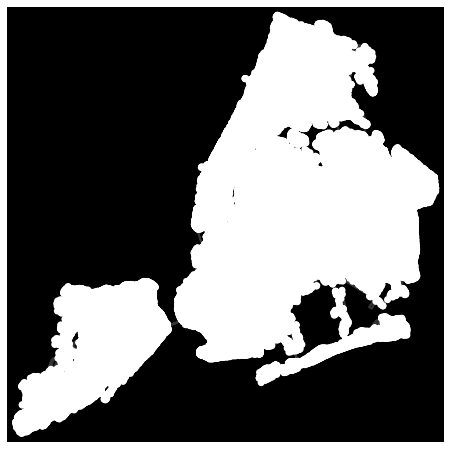

In [17]:
# plot the graph, coloring nodes by betweenness centrality
fig, ax = ox.plot_graph(
    G, bgcolor="k", node_size=5, edge_linewidth=2, edge_color="#333333"
)



C:\Users\miky_\miniconda3\envs\fare-prediction\lib\site-packages\osmnx\simplification.py:458: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  merged = utils_graph.graph_to_gdfs(G, edges=False)["geometry"].buffer(tolerance).unary_union
C:\Users\miky_\miniconda3\envs\fare-prediction\lib\site-packages\osmnx\simplification.py:506: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroids = node_clusters.centroid


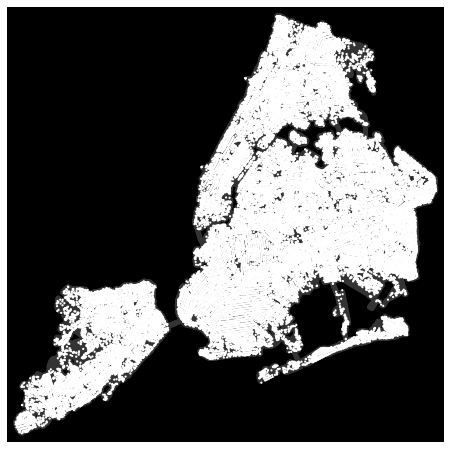

In [30]:
H = ox.simplification._consolidate_intersections_rebuild_graph(G, tolerance=0.00025, reconnect_edges=True)

fig, ax = ox.plot_graph(
    H, bgcolor="k", node_size=5, edge_linewidth=5, edge_color="#333333"
)

In [31]:
# save graph to shapefile, geopackage, or graphml
# ox.save_graph_shapefile(G, filepath="./graph_shapefile/")
# ox.save_graph_geopackage(G, filepath="./graph.gpkg")
ox.save_graphml(H, filepath="./new_york_final_0.00025.graphml")